# ML Estimator
- Input your data in the csv format
- Input the type of distribution
- Get parameters as your output 

pip install plotly

In [27]:
# importing libraries 
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.optimize import minimize
import sys
import os
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

person will be able to input the csv file and that file will extract the independent variable. Input from the user should be csv file and exact name of the alum of the independent variable for which Maximum likelihood has to be applied 

## `def read_data(file_path):`

The `read_data` function in your Maximum Likelihood Estimator program is responsible for loading data from a CSV file. Let me explain it step by step:

```python
def read_data(file_path):
    """Read data from CSV file."""
    try:
        # Check if file exists
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"File not found: {file_path}")
        
        # Check file extension
        if not file_path.lower().endswith('.csv'):
            raise ValueError("File must be a CSV file")
        
        # Read the data
        data = pd.read_csv(file_path)
        return data
    except Exception as e:
        print(f"Error reading data: {e}")
        sys.exit(1)
```

1. **Definition and Documentation**: 
   - `def read_data(file_path):` defines a function named `read_data` that takes one parameter, `file_path`.
   - The docstring `"""Read data from CSV file."""` briefly describes what the function does.

2. **Error Handling**:
   - The entire function body is wrapped in a `try-except` block to catch any errors that might occur.

3. **File Existence Check**:
   - `if not os.path.exists(file_path):` checks if the specified file exists at the given path.
   - If the file doesn't exist, it raises a `FileNotFoundError` with a descriptive message.

4. **File Extension Check**:
   - `if not file_path.lower().endswith('.csv'):` verifies that the file has a `.csv` extension.
   - The `.lower()` ensures this check is case-insensitive (it will accept `.csv`, `.CSV`, etc.).
   - If the file isn't a CSV file, it raises a `ValueError`.

5. **Data Loading**:
   - `data = pd.read_csv(file_path)` uses pandas' `read_csv` function to load the CSV file into a DataFrame.
   - This DataFrame is a table-like structure that contains all the data from the CSV file with rows and columns.

6. **Return Value**:
   - `return data` sends the loaded DataFrame back to the calling code for further processing.

7. **Exception Handling**:
   - If any error occurs during the process, the `except` block catches it.
   - `print(f"Error reading data: {e}")` displays an error message with details about what went wrong.
   - `sys.exit(1)` terminates the program with an exit code of 1, indicating an error occurred.

This function is essential because it:
1. Validates the input file before attempting to process it
2. Converts the raw CSV data into a pandas DataFrame, which makes it easier to manipulate
3. Provides clear error messages if something goes wrong
4. Handles errors gracefully by terminating the program rather than crashing unexpectedly

When you call this function with a file path, it either returns a DataFrame containing your data or exits with an error message if there's a problem with the file.

In [31]:
def read_data(file_path):
    """Read data from CSV file."""
    try:
        # Check if file exists
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"File not found: {file_path}")
       
        # Check file extension
        if not file_path.lower().endswith('.csv'):
            raise ValueError("File must be a CSV file")
        
        # Read the data
        data = pd.read_csv(file_path)
        return data
    except Exception as e:
        print(f"Error reading data: {e}")
        sys.exit(1)

---

## `def separate_numeric_non_numeric_columns(data)`:
This function `separate_numeric_non_numeric_columns` analyzes a pandas DataFrame and categorizes each column based on its data type. Let me explain it in detail:

### Purpose
The function's purpose is to identify which columns in your dataset contain numeric values (like integers or floating-point numbers) and which contain non-numeric values (like strings, dates, or boolean values).

### Parameters
- `data`: A pandas DataFrame that contains your dataset

### Return Values
- `numeric_cols`: A list containing the names of columns that have numeric data types
- `non_numeric_cols`: A list containing the names of columns that have non-numeric data types

### How It Works

1. **Initialization**:
   ```python
   numeric_cols = []
   non_numeric_cols = []
   ```
   Two empty lists are created to store the column names based on their data types.

2. **Column Iteration**:
   ```python
   for col in data.columns:
   ```
   The function loops through each column name in the DataFrame.

3. **Type Checking**:
   ```python
   if pd.api.types.is_numeric_dtype(data[col]):
   ```
   For each column, it checks if the data type is numeric using pandas' built-in function `is_numeric_dtype()`. This function returns `True` for:
   - Integers (int8, int16, int32, int64)
   - Floating-point numbers (float16, float32, float64)
   - Boolean values (which can be treated as 0 and 1)
   - Other numeric types like complex numbers

4. **Column Categorization**:
   ```python
   if pd.api.types.is_numeric_dtype(data[col]):
       numeric_cols.append(col)
   else:
       non_numeric_cols.append(col)
   ```
   Based on the type check:
   - If the column is numeric, its name is added to the `numeric_cols` list
   - If the column is non-numeric (strings, objects, dates, etc.), its name is added to the `non_numeric_cols` list

5. **Results**:
   ```python
   return numeric_cols, non_numeric_cols
   ```
   The function returns both lists as a tuple.

### Why This Function Is Important

In our Maximum Likelihood Estimator program, this function serves several crucial purposes:

1. **Data Type Awareness**: 
   Statistical distributions typically require numeric data. By identifying column types upfront, the program can guide users toward appropriate choices.

2. **Automatic Handling of Non-Numeric Data**:
   When a user selects a non-numeric column, the program knows it needs to encode those values to numbers before applying statistical methods.

3. **User Interface Enhancement**:
   The program can display column types to the user, making it clearer which columns might need special handling.

4. **Distribution Recommendations**:
   For non-numeric categorical data, the program can suggest using a categorical distribution rather than distributions designed for continuous numeric data.

By separating columns by data type early in the process, the program can provide appropriate guidance and automatically handle different data types correctly.

`pd.api.types` is a module within the pandas library that provides functions and tools specifically for type checking and type manipulation of pandas data structures :

### What is `pd.api.types`?

`pd.api.types` is a submodule of pandas that contains various functions for:

1. **Type checking**: Determining if a pandas object (like a Series or DataFrame column) is of a specific data type
2. **Type conversion**: Converting between different data types in pandas
3. **Type inference**: Helping to infer appropriate types for data

### Key Functions in `pd.api.types`

Some of the most commonly used functions in this module include:

- `is_numeric_dtype()`: Checks if the data type is numeric (integers, floats, etc.)
- `is_integer_dtype()`: Checks specifically for integer types
- `is_float_dtype()`: Checks specifically for floating-point types
- `is_string_dtype()`: Checks if the data type is string-like
- `is_categorical_dtype()`: Checks if the data is of categorical type
- `is_datetime64_dtype()`: Checks if the data is a datetime type
- `is_bool_dtype()`: Checks if the data is boolean

### In Code Context

In Maximum Likelihood Estimator program, we're using:

```python
if pd.api.types.is_numeric_dtype(data[col]):
```

This line checks if the data type of a specific column in DataFrame is numeric. The function examines the underlying NumPy dtype of the column and returns `True` if it's any numeric type (int8, int16, int32, int64, float16, float32, float64, etc.).

### Why This Approach Is Better Than Alternatives

Using `pd.api.types` functions offers several advantages:

1. **Robustness**: It correctly handles all the different numeric types in pandas, including different precisions of integers and floats.

2. **Future-proof**: If pandas adds new numeric types in future versions, `is_numeric_dtype()` will still work correctly without requiring code changes.

3. **Handles edge cases**: It correctly classifies types like boolean columns, which can be treated as numeric (0 and 1) but aren't standard numeric types.

4. **Respects pandas' type system**: It understands pandas-specific types like nullable integer types (Int64) that regular Python type checking might not handle correctly.

If we didn't use `pd.api.types.is_numeric_dtype()`, you'd need to write more complex logic to check for various numeric types manually, which would be more error-prone and less maintainable.

In [36]:
def separate_numeric_non_numeric_columns(data):
    """Separate numeric and non-numeric columns."""
    numeric_cols = []
    non_numeric_cols = []
    
    for col in data.columns:
        # Check if column is numeric
        if pd.api.types.is_numeric_dtype(data[col]):
            numeric_cols.append(col)
        else:
            non_numeric_cols.append(col)
    
    return numeric_cols, non_numeric_cols

---

## `def encode_non_numeric_column(data, column_name)`:

### Purpose
This function performs label encoding, which is a crucial preprocessing step in machine learning. Label encoding converts categorical (text) data into numeric form so that algorithms can process it mathematically.

### Function Parameters
- `data`: A pandas DataFrame containing your dataset
- `column_name`: The name of the categorical column you want to encode

### Step-by-Step Breakdown

1. **Creating a Safe Copy**:
   ```python
   encoded_data = data.copy()
   ```
   This creates a deep copy of the original DataFrame to maintain data integrity. It's good practice in data science to avoid modifying your original data, as you might need it later in its unaltered form.

2. **Identifying Unique Values**:
   ```python
   unique_values = encoded_data[column_name].unique()
   ```
   The `.unique()` method returns a NumPy array containing all distinct values from the column, with no duplicates. For example, if your column contained ['apple', 'orange', 'apple', 'banana'], this would return ['apple', 'orange', 'banana'].

3. **Creating the Mapping Dictionary**:
   ```python
   value_to_index = {value: idx for idx, value in enumerate(unique_values)}
   ```
   This dictionary comprehension:
   - Uses `enumerate()` to generate pairs of (index, value) from the unique values
   - Creates a dictionary where each categorical value is the key and its numeric index is the value
   - For example, if unique_values = ['apple', 'orange', 'banana'], this would create {'apple': 0, 'orange': 1, 'banana': 2}

4. **Applying the Encoding**:
   ```python
   encoded_data[column_name] = encoded_data[column_name].map(value_to_index)
   ```
   The `.map()` method replaces each value in the column with its corresponding value from the dictionary. This transforms all categorical values to their numeric representations.

5. **Returning the Results**:
   ```python
   return encoded_data[column_name].values, value_to_index
   ```
   - `.values` converts the pandas Series to a NumPy array for easier mathematical operations
   - The mapping dictionary is returned to allow you to decode the values later if needed

### This type of encoding is important because:


1. **ML Algorithm Compatibility**: Most machine learning algorithms (like linear regression, SVM, neural networks) require numeric inputs.

2. **Categorical Data Handling**: It transforms categorical data where there's an ordinal relationship (e.g., 'low', 'medium', 'high').

3. **Efficiency**: Label encoding is memory-efficient compared to alternatives like one-hot encoding for columns with many unique values.

4. **Information Preservation**: Unlike techniques that simply drop categorical columns, encoding preserves the information.

### Limitations to Be Aware Of

1. **Ordinal Assumption**: Label encoding implicitly assumes ordinal relationships between categories (0 < 1 < 2). This may introduce unwanted bias if no such relationship exists (like with 'red', 'blue', 'green').

2. **Distance Interpretation**: The algorithm might interpret the numeric difference between encodings as meaningful (e.g., 'apple'(0) and 'orange'(1) are "closer" than 'apple'(0) and 'banana'(2)).

3. **No Missing Value Handling**: The function doesn't handle NaN or missing values.

For non-ordinal categorical data, one-hot encoding is often a better choice to avoid introducing artificial ordinal relationships.

PS : need to work on this 

In [40]:
def encode_non_numeric_column(data, column_name):
    """Encode non-numeric column to numeric values."""
    # Create a copy of the data to avoid modifying the original
    encoded_data = data.copy()
    
    # Create a mapping of unique values to numeric indices
    unique_values = encoded_data[column_name].unique()
    value_to_index = {value: idx for idx, value in enumerate(unique_values)}
    
    # Replace string values with their numeric encoding
    encoded_data[column_name] = encoded_data[column_name].map(value_to_index)
    
    # Return the encoded data and the mapping for reference
    return encoded_data[column_name].values, value_to_index

---

## `def get_column_data(data, column_name, numeric_cols, non_numeric_cols) `:

### Purpose
This function extracts data from a specified column in a DataFrame, handling both numeric and non-numeric (categorical) data types differently. It's designed to prepare column data for further analysis or modeling.

### Function Parameters
- `data`: The pandas DataFrame containing your dataset
- `column_name`: The name of the column you want to extract
- `numeric_cols`: A list containing names of numeric columns in the dataset
- `non_numeric_cols`: A list containing names of non-numeric (categorical) columns in the dataset

### Step-by-Step Breakdown

1. **Error Handling with Try-Except**:
   ```python
   try:
       # Function body
   except Exception as e:
       print(f"Error extracting column data: {e}")
       sys.exit(1)
   ```
   The function wraps all operations in a try-except block to catch any errors that might occur during execution. If an error occurs, it prints the error message and exits the program with status code 1, indicating an error.

2. **Column Existence Check**:
   ```python
   if column_name not in data.columns:
       raise ValueError(f"Column '{column_name}' not found in the data")
   ```
   This validates that the requested column actually exists in the DataFrame. If not, it raises a ValueError with a descriptive message, which will be caught by the try-except block.

3. **Column Type Determination**:
   ```python
   if column_name in numeric_cols:
       # Handle numeric column
   else:
       # Handle non-numeric column
   ```
   The function uses the provided `numeric_cols` list to determine whether the column is numeric or non-numeric, and processes it accordingly.

4. **Handling Numeric Columns**:
   ```python
   column_data = data[column_name].dropna().values
   value_mapping = None
   ```
   For numeric columns:
   - It extracts the column data using `data[column_name]`
   - Removes any missing values with `.dropna()`
   - Converts to a NumPy array with `.values`
   - Sets `value_mapping` to None since no encoding is needed for numeric data

5. **Handling Non-Numeric (Categorical) Columns**:
   ```python
   column_data, value_mapping = encode_non_numeric_column(data, column_name)
   print(f"\nDetected non-numeric column. Encoding values to numbers:")
   for value, index in value_mapping.items():
       print(f"  '{value}' -> {index}")
   ```
   For categorical columns:
   - It calls the `encode_non_numeric_column` function (which you asked about earlier)
   - Gets back both the encoded values and the mapping dictionary
   - Prints information about the encoding for user reference, showing which original value maps to which numeric code

6. **Return Values**:
   ```python
   return column_data, value_mapping
   ```
   The function returns:
   - `column_data`: The processed column data as a NumPy array
   - `value_mapping`: For numeric columns, this is None. For categorical columns, this is the dictionary mapping original values to their numeric codes


### This function is particularly useful in data preprocessing pipelines for several reasons:

1. **Type-Aware Processing**: It handles both numeric and categorical data appropriately.

2. **Missing Value Handling**: For numeric columns, it removes missing values, which is often necessary before analysis.

3. **Automatic Encoding**: It automatically encodes categorical data to numeric form when needed.

4. **User Feedback**: It provides clear feedback about the encoding process, helping users understand how categorical values are being transformed.

5. **Error Handling**: It includes robust error checking to prevent pipeline failures due to missing columns or other issues.

6. **Pipeline Integration**: By returning both the processed data and the mapping information, it provides everything needed for both analysis and later interpretation of results.

This function would typically be used as part of a larger data preprocessing workflow, where you need to extract and prepare individual columns for analysis, visualization, or model training.

In [44]:
def get_column_data(data, column_name, numeric_cols, non_numeric_cols):
    """Extract data from specified column, handling numeric and non-numeric types."""
    try:
        if column_name not in data.columns:
            raise ValueError(f"Column '{column_name}' not found in the data")
        
        # Check if column is numeric or non-numeric
        if column_name in numeric_cols:
            # Extract the column data
            column_data = data[column_name].dropna().values
            value_mapping = None
        else:
            # Encode non-numeric column to numeric values
            column_data, value_mapping = encode_non_numeric_column(data, column_name)
            print(f"\nDetected non-numeric column. Encoding values to numbers:")
            for value, index in value_mapping.items():
                print(f"  '{value}' -> {index}")
        
        return column_data, value_mapping
    except Exception as e:
        print(f"Error extracting column data: {e}")
        sys.exit(1)

---

# Understanding Negative Log-Likelihood Functions in Statistical Analysis

### Log-Likelihood and Maximum Likelihood Estimation (MLE)

The **likelihood function** measures how well a statistical model with specific parameters explains observed data. For a set of observations, it tells us the probability of observing that exact data given our model parameters.

We typically work with the **log-likelihood** (the natural logarithm of the likelihood) for computational advantages:
- Converting multiplication to addition (easier computation)
- Avoiding numerical underflow with very small probabilities
- Making optimization more stable

  <img title="a title" alt="Alt text" src="01.png" style="width:700px">
  <br>
   <img title="a title" alt="Alt text" src="02.png" style="width:700px">
   <br>
    <img title="a title" alt="Alt text" src="03.png" style="width:700px">

    PS: photo source : https://www.youtube.com/watch?v=pYxNSUDSFH4, https://youtu.be/XepXtl9YKwc?si=atEfNcZNIQbL97Jw
    Thank you statQuest 

**Negative log-likelihood** is used because optimization algorithms commonly minimize rather than maximize functions, so we flip the sign to convert our maximization problem to a minimization one.

## General Pattern in These Functions

Each function follows a similar structure:
1. Take distribution parameters and data as inputs
2. Check if parameters are valid (constraints like positivity)
3. Return infinite value if parameters are invalid (to exclude them from consideration)
4. Calculate and return the negative sum of log probability densities/masses

Now, let's break down each function:

## Function-by-Function Analysis

### 1. `negative_log_likelihood_normal`

```python
def negative_log_likelihood_normal(params, data):
    """Negative log-likelihood function for normal distribution."""
    mu, sigma = params
    if sigma <= 0:
        return np.inf
    return -np.sum(stats.norm.logpdf(data, loc=mu, scale=sigma))
```

**Statistical Context**: The normal (Gaussian) distribution is defined by:
- `mu` (μ): mean
- `sigma` (σ): standard deviation

**Parameter Constraints**:
- σ must be positive

**Implementation Details**:
- `stats.norm.logpdf()` calculates log probability density for each data point
- `np.sum()` adds these values
- Negative sign converts to negative log-likelihood

**Probability Density Function**:
f(x|μ,σ) = (1/(σ√2π)) * e^(-(x-μ)²/2σ²)

### 2. `negative_log_likelihood_exponential`

```python
def negative_log_likelihood_exponential(params, data):
    """Negative log-likelihood function for exponential distribution."""
    lambda_param = params[0]
    if lambda_param <= 0:
        return np.inf
    return -np.sum(stats.expon.logpdf(data, scale=1/lambda_param))
```

**Statistical Context**: The exponential distribution models time between events in a Poisson process:
- `lambda_param` (λ): rate parameter

**Parameter Constraints**:
- λ must be positive

**Implementation Details**:
- Note that `scipy.stats.expon` uses `scale=1/λ` parameterization
- This is because scipy's scale is the inverse of the rate parameter

**Probability Density Function**:
f(x|λ) = λe^(-λx) for x ≥ 0

### 3. `negative_log_likelihood_gamma`

```python
def negative_log_likelihood_gamma(params, data):
    """Negative log-likelihood function for gamma distribution."""
    alpha, beta = params
    if alpha <= 0 or beta <= 0:
        return np.inf
    return -np.sum(stats.gamma.logpdf(data, a=alpha, scale=1/beta))
```

**Statistical Context**: The gamma distribution is used for:
- Wait times
- Rainfall amounts
- Survival analysis
- `alpha` (α): shape parameter
- `beta` (β): rate parameter

**Parameter Constraints**:
- Both α and β must be positive

**Implementation Notes**:
- `a=alpha`: shape parameter
- `scale=1/beta`: scipy uses inverse of rate parameter

**Probability Density Function**:
f(x|α,β) = (β^α/Γ(α)) * x^(α-1) * e^(-βx) for x > 0

### 4. `negative_log_likelihood_lognormal`

```python
def negative_log_likelihood_lognormal(params, data):
    """Negative log-likelihood function for lognormal distribution."""
    mu, sigma = params
    if sigma <= 0:
        return np.inf
    return -np.sum(stats.lognorm.logpdf(data, s=sigma, scale=np.exp(mu)))
```

**Statistical Context**: The lognormal distribution models variables whose logarithm is normally distributed:
- `mu` (μ): mean of the log of the variable
- `sigma` (σ): standard deviation of the log of the variable

**Parameter Constraints**:
- σ must be positive

**Implementation Notes**:
- `s=sigma`: shape parameter
- `scale=np.exp(mu)`: scipy parameterization

**Probability Density Function**:
f(x|μ,σ) = (1/(xσ√2π)) * e^(-(ln(x)-μ)²/2σ²) for x > 0

### 5. `negative_log_likelihood_weibull`

```python
def negative_log_likelihood_weibull(params, data):
    """Negative log-likelihood function for Weibull distribution."""
    k, lambda_param = params
    if k <= 0 or lambda_param <= 0:
        return np.inf
    return -np.sum(stats.weibull_min.logpdf(data, c=k, scale=lambda_param))
```

**Statistical Context**: The Weibull distribution is often used in reliability engineering and survival analysis:
- `k`: shape parameter
- `lambda_param` (λ): scale parameter

**Parameter Constraints**:
- Both k and λ must be positive

**Implementation Notes**:
- `c=k`: shape parameter
- `scale=lambda_param`: scale parameter

**Probability Density Function**:
f(x|k,λ) = (k/λ)(x/λ)^(k-1)e^(-(x/λ)^k) for x ≥ 0

### 6. `negative_log_likelihood_uniform`

```python
def negative_log_likelihood_uniform(params, data):
    """Negative log-likelihood function for uniform distribution."""
    a, b = params
    if a >= b:
        return np.inf
    if np.min(data) < a or np.max(data) > b:
        return np.inf
    return -np.sum(stats.uniform.logpdf(data, loc=a, scale=b-a))
```

**Statistical Context**: The uniform distribution represents equal probability across a range:
- `a`: lower bound
- `b`: upper bound

**Parameter Constraints**:
- a < b
- All data points must be within [a,b]

**Implementation Notes**:
- Additional check to ensure all data is within bounds
- `scale=b-a`: scipy uses width parameter

**Probability Density Function**:
f(x|a,b) = 1/(b-a) for a ≤ x ≤ b

### 7. `negative_log_likelihood_poisson`

```python
def negative_log_likelihood_poisson(params, data):
    """Negative log-likelihood function for Poisson distribution."""
    mu = params[0]
    if mu <= 0:
        return np.inf
    return -np.sum(stats.poisson.logpmf(data, mu))
```

**Statistical Context**: The Poisson distribution models count data:
- `mu` (μ): average rate of occurrence

**Parameter Constraints**:
- μ must be positive

**Implementation Notes**:
- Uses `logpmf` instead of `logpdf` since Poisson is a discrete distribution

**Probability Mass Function**:
P(X=k|μ) = (e^(-μ) * μ^k) / k!

### 8. `negative_log_likelihood_bernoulli`

```python
def negative_log_likelihood_bernoulli(params, data):
    """Negative log-likelihood function for Bernoulli distribution."""
    p = params[0]
    if p <= 0 or p >= 1:
        return np.inf
    return -np.sum(stats.bernoulli.logpmf(data, p))
```

**Statistical Context**: The Bernoulli distribution models binary outcomes:
- `p`: probability of success (1)

**Parameter Constraints**:
- 0 < p < 1

**Probability Mass Function**:
P(X=k|p) = p^k * (1-p)^(1-k) for k ∈ {0,1}

### 9. `negative_log_likelihood_binomial`

```python
def negative_log_likelihood_binomial(params, data, n):
    """Negative log-likelihood function for binomial distribution."""
    p = params[0]
    if p <= 0 or p >= 1:
        return np.inf
    return -np.sum(stats.binom.logpmf(data, n, p))
```

**Statistical Context**: The binomial distribution models count of successes in n trials:
- `p`: probability of success in a single trial
- `n`: number of trials (fixed parameter)

**Parameter Constraints**:
- 0 < p < 1

**Implementation Notes**:
- Takes additional parameter `n` that remains fixed during optimization

**Probability Mass Function**:
P(X=k|n,p) = (n choose k) * p^k * (1-p)^(n-k)

### 10. `negative_log_likelihood_categorical`

```python
def negative_log_likelihood_categorical(params, data, categories):
    """Negative log-likelihood function for categorical distribution."""
    # Ensure probabilities sum to 1
    if np.sum(params) != 1.0:
        normalized_params = params / np.sum(params)
    else:
        normalized_params = params
    
    # Check bounds
    if np.min(normalized_params) < 0 or np.max(normalized_params) > 1:
        return np.inf
    
    log_likelihood = 0
    for i in range(len(categories)):
        count = np.sum(data == i)
        if count > 0:
            log_likelihood += count * np.log(normalized_params[i])
    
    return -log_likelihood
```

**Statistical Context**: The categorical distribution generalizes the Bernoulli distribution to multiple outcomes:
- `params`: probability vector for each category

**Parameter Constraints**:
- Each probability must be between 0 and 1
- Probabilities must sum to 1

**Implementation Notes**:
- Normalizes probabilities if they don't sum to 1
- Counts occurrences of each category and multiplies by log-probability
- More manually implemented than others because it doesn't use a built-in SciPy function

**Probability Mass Function**:
P(X=i|p₁,...,pₖ) = pᵢ where i is a category index

## How These Functions Are Used in Practice

These functions would typically be used with an optimization routine like `scipy.optimize.minimize` to find the parameter values that minimize the negative log-likelihood, which is equivalent to maximizing the likelihood.

```python
from scipy import optimize

# Example for normal distribution
initial_guess = [0, 1]  # Initial guess for mean and standard deviation
result = optimize.minimize(negative_log_likelihood_normal, initial_guess, args=(data,))
optimal_mu, optimal_sigma = result.x
```

This process gives you Maximum Likelihood Estimates (MLEs) of the distribution parameters, which are the parameter values that make your observed data most probable under the assumed distribution.


In [48]:
def negative_log_likelihood_normal(params, data):
    """Negative log-likelihood function for normal distribution."""
    mu, sigma = params
    if sigma <= 0:
        return np.inf
    return -np.sum(stats.norm.logpdf(data, loc=mu, scale=sigma))

def negative_log_likelihood_exponential(params, data):
    """Negative log-likelihood function for exponential distribution."""
    lambda_param = params[0]
    if lambda_param <= 0:
        return np.inf
    return -np.sum(stats.expon.logpdf(data, scale=1/lambda_param))

def negative_log_likelihood_gamma(params, data):
    """Negative log-likelihood function for gamma distribution."""
    alpha, beta = params
    if alpha <= 0 or beta <= 0:
        return np.inf
    return -np.sum(stats.gamma.logpdf(data, a=alpha, scale=1/beta))

def negative_log_likelihood_lognormal(params, data):
    """Negative log-likelihood function for lognormal distribution."""
    mu, sigma = params
    if sigma <= 0:
        return np.inf
    return -np.sum(stats.lognorm.logpdf(data, s=sigma, scale=np.exp(mu)))

def negative_log_likelihood_weibull(params, data):
    """Negative log-likelihood function for Weibull distribution."""
    k, lambda_param = params
    if k <= 0 or lambda_param <= 0:
        return np.inf
    return -np.sum(stats.weibull_min.logpdf(data, c=k, scale=lambda_param))

def negative_log_likelihood_uniform(params, data):
    """Negative log-likelihood function for uniform distribution."""
    a, b = params
    if a >= b:
        return np.inf
    if np.min(data) < a or np.max(data) > b:
        return np.inf
    return -np.sum(stats.uniform.logpdf(data, loc=a, scale=b-a))

def negative_log_likelihood_poisson(params, data):
    """Negative log-likelihood function for Poisson distribution."""
    mu = params[0]
    if mu <= 0:
        return np.inf
    return -np.sum(stats.poisson.logpmf(data, mu))

def negative_log_likelihood_bernoulli(params, data):
    """Negative log-likelihood function for Bernoulli distribution."""
    p = params[0]
    if p <= 0 or p >= 1:
        return np.inf
    return -np.sum(stats.bernoulli.logpmf(data, p))

def negative_log_likelihood_binomial(params, data, n):
    """Negative log-likelihood function for binomial distribution."""
    p = params[0]
    if p <= 0 or p >= 1:
        return np.inf
    return -np.sum(stats.binom.logpmf(data, n, p))

def negative_log_likelihood_categorical(params, data, categories):
    """Negative log-likelihood function for categorical distribution."""
    # Ensure probabilities sum to 1
    if np.sum(params) != 1.0:
        normalized_params = params / np.sum(params)
    else:
        normalized_params = params
    
    # Check bounds
    if np.min(normalized_params) < 0 or np.max(normalized_params) > 1:
        return np.inf
    
    log_likelihood = 0
    for i in range(len(categories)):
        count = np.sum(data == i)
        if count > 0:
            log_likelihood += count * np.log(normalized_params[i])
    
    return -log_likelihood


---

# `def estimate_parameters(data, distribution, value_mapping=None)`:

This function implements maximum likelihood estimation (MLE) for various probability distributions.

## Overall Function Purpose

`estimate_parameters` takes data and a distribution type (and optionally a value mapping for categorical data), then estimates the optimal parameters of that distribution to fit the provided data using maximum likelihood estimation.

## Function Signature

```python
def estimate_parameters(data, distribution, value_mapping=None):
```

- **`data`**: NumPy array containing your observations
- **`distribution`**: String specifying which probability distribution to fit
- **`value_mapping`**: Optional dictionary mapping categorical values to indices (only used for categorical distribution)

## General Structure

The function is organized as a large conditional block that:
1. Identifies the requested distribution
2. Creates appropriate initial parameter guesses
3. Calls `minimize` to find optimal parameters
4. Returns a dictionary of named parameters

Let's examine each distribution case:

## 1. Normal Distribution

```python
if distribution == 'normal':
    # Initial guess: mean and standard deviation of the data
    initial_guess = [np.mean(data), np.std(data)]
    result = minimize(negative_log_likelihood_normal, initial_guess, args=(data,), method='Nelder-Mead')
    params = {'mu': result.x[0], 'sigma': result.x[1]}
```

**Statistical approach**:
- Uses sample mean and standard deviation as initial guesses
- These are actually the analytical MLE solutions for normal distribution
- The optimization should converge to these values if not constrained

**Implementation details**:
- `minimize` from SciPy's optimization module finds parameters that minimize the negative log-likelihood
- `method='Nelder-Mead'` specifies a derivative-free optimization algorithm
- Returns a dictionary with 'mu' and 'sigma' parameters

## 2. Exponential Distribution

```python
elif distribution == 'exponential':
    # Initial guess: 1/mean of the data
    initial_guess = [1/np.mean(data)]
    result = minimize(negative_log_likelihood_exponential, initial_guess, args=(data,), method='Nelder-Mead')
    params = {'lambda': result.x[0]}
```

**Statistical approach**:
- For exponential distribution, the MLE of λ is 1/sample_mean
- Uses this as the initial guess which should be optimal

**Implementation details**:
- Only one parameter (λ) needs to be estimated
- The `initial_guess` is already the analytical solution, but optimization is still performed

## 3. Gamma Distribution

```python
elif distribution == 'gamma':
    # Initial guess: alpha=mean^2/variance, beta=mean/variance
    mean = np.mean(data)
    var = np.var(data)
    alpha_init = mean**2 / var if var > 0 else 1
    beta_init = mean / var if var > 0 else 1
    initial_guess = [alpha_init, beta_init]
    result = minimize(negative_log_likelihood_gamma, initial_guess, args=(data,), method='Nelder-Mead')
    params = {'alpha': result.x[0], 'beta': result.x[1]}
```

**Statistical approach**:
- For gamma distribution, uses method of moments to create initial guesses
- Formulas derived from: 
  - Mean of gamma = α/β
  - Variance of gamma = α/β²
- Solving these equations yields: α = mean²/var and β = mean/var

**Implementation details**:
- Handles edge case when variance is zero by defaulting to 1
- Returns both shape (α) and rate (β) parameters

## 4. Lognormal Distribution

```python
elif distribution == 'lognormal':
    # Initial guess: mean and standard deviation of log(data)
    log_data = np.log(data)
    initial_guess = [np.mean(log_data), np.std(log_data)]
    result = minimize(negative_log_likelihood_lognormal, initial_guess, args=(data,), method='Nelder-Mead')
    params = {'mu': result.x[0], 'sigma': result.x[1]}
```

**Statistical approach**:
- For lognormal, the MLEs of μ and σ are the mean and std of the log of the data
- Takes logarithm of data before calculating initial guesses

**Implementation details**:
- Uses the logarithm transformation to convert to normal space
- These initial guesses should be optimal, but optimization checks this

## 5. Weibull Distribution

```python
elif distribution == 'weibull':
    # Initial guess: k=1, lambda=mean
    initial_guess = [1, np.mean(data)]
    result = minimize(negative_log_likelihood_weibull, initial_guess, args=(data,), method='Nelder-Mead')
    params = {'k': result.x[0], 'lambda': result.x[1]}
```

**Statistical approach**:
- Sets shape parameter k=1 initially (which makes Weibull equivalent to exponential)
- Uses mean as initial guess for scale parameter λ

**Implementation details**:
- No analytical solution exists, so numerical optimization is necessary
- Simple initial guesses help the optimizer find a good solution

## 6. Uniform Distribution

```python
elif distribution == 'uniform':
    # Initial guess: min and max of the data
    initial_guess = [np.min(data), np.max(data)]
    result = minimize(negative_log_likelihood_uniform, initial_guess, args=(data,), method='Nelder-Mead')
    params = {'a': result.x[0], 'b': result.x[1]}
```

**Statistical approach**:
- For uniform distribution, MLEs are simply min and max of the data
- Uses these as initial guesses

**Implementation details**:
- These initial guesses are the analytical solution, but optimization is performed anyway
- Returns lower bound 'a' and upper bound 'b'

## 7. Poisson Distribution

```python
elif distribution == 'poisson':
    # Initial guess: mean of the data
    initial_guess = [np.mean(data)]
    result = minimize(negative_log_likelihood_poisson, initial_guess, args=(data,), method='Nelder-Mead')
    params = {'mu': result.x[0]}
```

**Statistical approach**:
- For Poisson distribution, MLE of λ is the sample mean
- Uses sample mean as initial guess

**Implementation details**:
- This initial guess should be optimal, but optimization confirms this
- Returns rate parameter 'mu' (λ)

## 8. Bernoulli Distribution

```python
elif distribution == 'bernoulli':
    # Initial guess: mean of the data
    initial_guess = [np.mean(data)]
    result = minimize(negative_log_likelihood_bernoulli, initial_guess, args=(data,), method='Nelder-Mead')
    params = {'p': result.x[0]}
```

**Statistical approach**:
- For Bernoulli, MLE of p is proportion of 1s in the data (i.e., the mean)
- Uses sample mean as initial guess

**Implementation details**:
- This initial guess should already be optimal, but optimization verifies this
- Returns success probability parameter 'p'

## 9. Binomial Distribution

```python
elif distribution == 'binomial':
    # For binomial, we need the number of trials n
    n = int(np.max(data))
    # Initial guess: mean of the data / n
    initial_guess = [np.mean(data) / n]
    result = minimize(lambda p, d, n: negative_log_likelihood_binomial(p, d, n), initial_guess, args=(data, n), method='Nelder-Mead')
    params = {'p': result.x[0], 'n': n}
```

**Statistical approach**:
- Assumes n (number of trials) is maximum value in data
- Initial guess for p is sample mean divided by n
- MLE of p is sum of all successes divided by (n × number of experiments)

**Implementation details**:
- Uses a lambda function to create a wrapper that includes fixed parameter n
- Returns both success probability 'p' and trials count 'n'

## 10. Categorical Distribution

```python
elif distribution == 'categorical' and value_mapping is not None:
    # For categorical data (non-numeric originally)
    categories = list(range(len(value_mapping)))
    # Initial guess: uniform probabilities
    initial_guess = np.ones(len(categories)) / len(categories)
    
    # Constraints to ensure probabilities sum to 1
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1.0})
    bounds = [(0, 1) for _ in range(len(categories))]
    
    result = minimize(
        negative_log_likelihood_categorical, 
        initial_guess, 
        args=(data, categories), 
        method='SLSQP',
        constraints=constraints,
        bounds=bounds
    )
    
    # Create parameter dictionary with value mappings
    params = {}
    for value, index in value_mapping.items():
        params[f'p({value})'] = result.x[index]
```

**Statistical approach**:
- Starts with uniform probability distribution across categories
- MLEs would be the observed proportions of each category

**Implementation details**:
- Uses `SLSQP` method which supports constraints
- Adds explicit constraint that probabilities must sum to 1
- Adds bounds to ensure each probability is between 0 and 1
- Creates a more descriptive output dictionary using original category names

## Error Handling

```python
try:
    # Main code...
except Exception as e:
    print(f"Error estimating parameters: {e}")
    sys.exit(1)
```

The function uses a try-except block to catch any errors during parameter estimation and exits the program with an error code if something goes wrong.

## Statistical Significance

This function is applying the core statistical principle of maximum likelihood estimation:

1. **Initial Guesses**: For many distributions, it starts with method of moments estimators or educated guesses
2. **Optimization**: Uses numerical optimization to find parameters that maximize likelihood
3. **Parameter Constraints**: Enforces valid parameter spaces (especially for categorical distribution)
4. **Named Results**: Returns parameters in a structured dictionary format

Many of the initial guesses are actually the analytical MLE solutions, but the function still performs numerical optimization as a more general approach that works across all distributions.

In [52]:
def estimate_parameters(data, distribution, value_mapping=None):
    """Estimate parameters using maximum likelihood estimation."""
    try:
        if distribution == 'normal':
            # Initial guess: mean and standard deviation of the data
            initial_guess = [np.mean(data), np.std(data)]
            result = minimize(negative_log_likelihood_normal, initial_guess, args=(data,), method='Nelder-Mead')
            params = {'mu': result.x[0], 'sigma': result.x[1]}
            
        elif distribution == 'exponential':
            # Initial guess: 1/mean of the data
            initial_guess = [1/np.mean(data)]
            result = minimize(negative_log_likelihood_exponential, initial_guess, args=(data,), method='Nelder-Mead')
            params = {'lambda': result.x[0]}
            
        elif distribution == 'gamma':
            # Initial guess: alpha=mean^2/variance, beta=mean/variance
            mean = np.mean(data)
            var = np.var(data)
            alpha_init = mean**2 / var if var > 0 else 1
            beta_init = mean / var if var > 0 else 1
            initial_guess = [alpha_init, beta_init]
            result = minimize(negative_log_likelihood_gamma, initial_guess, args=(data,), method='Nelder-Mead')
            params = {'alpha': result.x[0], 'beta': result.x[1]}
            
        elif distribution == 'lognormal':
            # Initial guess: mean and standard deviation of log(data)
            log_data = np.log(data)
            initial_guess = [np.mean(log_data), np.std(log_data)]
            result = minimize(negative_log_likelihood_lognormal, initial_guess, args=(data,), method='Nelder-Mead')
            params = {'mu': result.x[0], 'sigma': result.x[1]}
            
        elif distribution == 'weibull':
            # Initial guess: k=1, lambda=mean
            initial_guess = [1, np.mean(data)]
            result = minimize(negative_log_likelihood_weibull, initial_guess, args=(data,), method='Nelder-Mead')
            params = {'k': result.x[0], 'lambda': result.x[1]}
            
        elif distribution == 'uniform':
            # Initial guess: min and max of the data
            initial_guess = [np.min(data), np.max(data)]
            result = minimize(negative_log_likelihood_uniform, initial_guess, args=(data,), method='Nelder-Mead')
            params = {'a': result.x[0], 'b': result.x[1]}
            
        elif distribution == 'poisson':
            # Initial guess: mean of the data
            initial_guess = [np.mean(data)]
            result = minimize(negative_log_likelihood_poisson, initial_guess, args=(data,), method='Nelder-Mead')
            params = {'mu': result.x[0]}
            
        elif distribution == 'bernoulli':
            # Initial guess: mean of the data
            initial_guess = [np.mean(data)]
            result = minimize(negative_log_likelihood_bernoulli, initial_guess, args=(data,), method='Nelder-Mead')
            params = {'p': result.x[0]}
            
        elif distribution == 'binomial':
            # For binomial, we need the number of trials n
            n = int(np.max(data))
            # Initial guess: mean of the data / n
            initial_guess = [np.mean(data) / n]
            result = minimize(lambda p, d, n: negative_log_likelihood_binomial(p, d, n), initial_guess, args=(data, n), method='Nelder-Mead')
            params = {'p': result.x[0], 'n': n}
            
        elif distribution == 'categorical' and value_mapping is not None:
            # For categorical data (non-numeric originally)
            categories = list(range(len(value_mapping)))
            # Initial guess: uniform probabilities
            initial_guess = np.ones(len(categories)) / len(categories)
            
            # Constraints to ensure probabilities sum to 1
            constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1.0})
            bounds = [(0, 1) for _ in range(len(categories))]
            
            result = minimize(
                negative_log_likelihood_categorical, 
                initial_guess, 
                args=(data, categories), 
                method='SLSQP',
                constraints=constraints,
                bounds=bounds
            )
            
            # Create parameter dictionary with value mappings
            params = {}
            for value, index in value_mapping.items():
                params[f'p({value})'] = result.x[index]
            
        else:
            raise ValueError(f"Distribution '{distribution}' not supported")
        
        return params
    
    except Exception as e:
        print(f"Error estimating parameters: {e}")
        sys.exit(1)


---

# `def plot_distribution(data, distribution, params, value_mapping=None)`:

This function creates visualization plots to help analyze how well a statistical distribution fits a given dataset. 

## Function Overview

```python
def plot_distribution(data, distribution, params, value_mapping=None):
```

This function takes four parameters:
- `data`: The dataset you want to analyze
- `distribution`: The type of distribution to fit (like 'normal', 'exponential', etc.)
- `params`: Parameters of the distribution that have been estimated (likely through maximum likelihood estimation)
- `value_mapping`: An optional mapping for categorical data

## Visualization Creation Process

The function creates two main types of visualizations:

1. For continuous or discrete distributions (normal, exponential, etc.):
   - A side-by-side plot showing your data histogram and the fitted distribution
   - A superimposed plot showing both the data histogram and fitted curve on the same graph

2. For categorical data:
   - A bar chart showing the probability of each category

## How It Works Step-by-Step

1. **Initial Setup**: The function creates a figure with two subplots using `make_subplots` from Plotly.

2. **Data Histogram**: Adds a histogram of your raw data to the first subplot.

3. **Distribution Handling**:
   - For categorical data: Creates a bar chart of the estimated probabilities for each category
   - For continuous/discrete distributions: Generates the appropriate probability density function (PDF) or probability mass function (PMF)

4. **Distribution-Specific Plotting**:
   The function handles many different types of distributions:
   
   - **Continuous distributions**:
     - Normal: Uses `stats.norm.pdf()` with the estimated mean (`mu`) and standard deviation (`sigma`)
     - Exponential: Uses `stats.expon.pdf()` with rate parameter (`lambda`)
     - Gamma: Uses `stats.gamma.pdf()` with shape (`alpha`) and rate (`beta`) parameters
     - Lognormal: Uses `stats.lognorm.pdf()` with location (`mu`) and scale (`sigma`) parameters
     - Weibull: Uses `stats.weibull_min.pdf()` with shape (`k`) and scale (`lambda`) parameters
     - Uniform: Uses `stats.uniform.pdf()` with minimum (`a`) and maximum (`b`) parameters
   
   - **Discrete distributions**:
     - Poisson: Uses `stats.poisson.pmf()` with mean (`mu`) parameter
     - Bernoulli: Uses `stats.bernoulli.pmf()` with probability (`p`) parameter
     - Binomial: Uses `stats.binom.pmf()` with trials (`n`) and probability (`p`) parameters

5. **Superimposed Plot Creation**:
   - Creates a combined visualization where both the normalized data histogram and the fitted distribution are shown on the same graph
   - Different handling for continuous vs. discrete distributions
   - Helpful for visually assessing how well the distribution fits the data

## Error Handling

The function is wrapped in a try-except block to catch and report any errors during the plotting process.

## Key Visualization Techniques

- Uses Plotly's `go.Histogram` for data visualization
- Uses `go.Scatter` with `mode='lines'` for continuous distribution curves
- Uses `go.Bar` for discrete distributions and categorical data
- Creates normalized histograms with `histnorm='probability density'` to match the scale of the distribution functions

This function is particularly useful for statistical analysis, allowing you to visually confirm whether your chosen distribution is appropriate for your data and whether the parameter estimates make sense.

In [56]:
def plot_distribution(data, distribution, params, value_mapping=None):
    """Create visualization plots for the estimated distribution."""
    try:
        # Create a figure with subplots
        fig = make_subplots(rows=1, cols=2, 
                           subplot_titles=('Data Histogram', 'Distribution Fit'),
                           specs=[[{"type": "xy"}, {"type": "xy"}]])
        
        # Generate histogram of the data
        fig.add_trace(go.Histogram(x=data, name='Data', opacity=0.7, nbinsx=30), row=1, col=1)
        
        # Generate x values for distribution plotting
        if distribution == 'categorical' and value_mapping is not None:
            # For categorical data, create a bar chart
            categories = list(value_mapping.keys())
            probabilities = [params[f'p({cat})'] for cat in categories]
            
            fig = make_subplots(rows=1, cols=1, 
                               subplot_titles=('Categorical Distribution Probabilities',))
            fig.add_trace(go.Bar(x=categories, y=probabilities, name='Estimated Probabilities'))
            fig.update_layout(title=f'Categorical Distribution - Maximum Likelihood Estimation',
                             xaxis_title='Categories', yaxis_title='Probability')
            
        else:
            # For continuous distributions, create a line plot
            x_min = np.min(data)
            x_max = np.max(data)
            x = np.linspace(x_min, x_max, 1000)
            
            if distribution == 'normal':
                y = stats.norm.pdf(x, loc=params['mu'], scale=params['sigma'])
                fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Normal Fit'), row=1, col=2)
                
            elif distribution == 'exponential':
                y = stats.expon.pdf(x, scale=1/params['lambda'])
                fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Exponential Fit'), row=1, col=2)
                
            elif distribution == 'gamma':
                y = stats.gamma.pdf(x, a=params['alpha'], scale=1/params['beta'])
                fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Gamma Fit'), row=1, col=2)
                
            elif distribution == 'lognormal':
                y = stats.lognorm.pdf(x, s=params['sigma'], scale=np.exp(params['mu']))
                fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Lognormal Fit'), row=1, col=2)
                
            elif distribution == 'weibull':
                y = stats.weibull_min.pdf(x, c=params['k'], scale=params['lambda'])
                fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Weibull Fit'), row=1, col=2)
                
            elif distribution == 'uniform':
                y = stats.uniform.pdf(x, loc=params['a'], scale=params['b']-params['a'])
                fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Uniform Fit'), row=1, col=2)
                
            elif distribution == 'poisson':
                # For discrete distributions like Poisson, use integer x values
                x_int = np.arange(int(x_min), int(x_max) + 1)
                y = stats.poisson.pmf(x_int, params['mu'])
                fig.add_trace(go.Bar(x=x_int, y=y, name='Poisson Fit'), row=1, col=2)
                
            elif distribution == 'bernoulli':
                # For Bernoulli, just two possible values (0 and 1)
                x_binary = np.array([0, 1])
                y = stats.bernoulli.pmf(x_binary, params['p'])
                fig.add_trace(go.Bar(x=x_binary, y=y, name='Bernoulli Fit'), row=1, col=2)
                
            elif distribution == 'binomial':
                # For binomial, use integer x values from 0 to n
                x_int = np.arange(0, params['n'] + 1)
                y = stats.binom.pmf(x_int, params['n'], params['p'])
                fig.add_trace(go.Bar(x=x_int, y=y, name='Binomial Fit'), row=1, col=2)
            
            fig.update_layout(title=f'{distribution.capitalize()} Distribution - Maximum Likelihood Estimation',
                             xaxis_title='Value', yaxis_title='Density/Probability')
            
        # Show the plot
        fig.show()
        
        # Create a superimposed plot (histogram and fitted curve)
        if distribution != 'categorical':
            fig_combined = go.Figure()
            
            # Add the histogram with normalized counts
            fig_combined.add_trace(go.Histogram(
                x=data, 
                name='Data', 
                opacity=0.7, 
                nbinsx=30,
                histnorm='probability density'  # Normalize to match density scale
            ))
            
            # Add the fitted curve for continuous distributions
            if distribution in ['normal', 'exponential', 'gamma', 'lognormal', 'weibull', 'uniform']:
                fig_combined.add_trace(go.Scatter(
                    x=x, 
                    y=y, 
                    mode='lines', 
                    name=f'{distribution.capitalize()} Fit',
                    line=dict(color='red', width=2)
                ))
            # Add the fitted probabilities for discrete distributions
            elif distribution in ['poisson', 'bernoulli', 'binomial']:
                if distribution == 'poisson':
                    fig_combined.add_trace(go.Scatter(
                        x=x_int, 
                        y=y, 
                        mode='lines+markers', 
                        name=f'{distribution.capitalize()} Fit',
                        line=dict(color='red', width=2)
                    ))
                elif distribution == 'bernoulli':
                    fig_combined.add_trace(go.Scatter(
                        x=x_binary, 
                        y=y, 
                        mode='lines+markers', 
                        name=f'{distribution.capitalize()} Fit',
                        line=dict(color='red', width=2)
                    ))
                elif distribution == 'binomial':
                    fig_combined.add_trace(go.Scatter(
                        x=x_int, 
                        y=y, 
                        mode='lines+markers', 
                        name=f'{distribution.capitalize()} Fit',
                        line=dict(color='red', width=2)
                    ))
            
            fig_combined.update_layout(
                title=f'Superimposed Plot: Data Histogram vs {distribution.capitalize()} Fit',
                xaxis_title='Value',
                yaxis_title='Density/Probability',
                legend=dict(x=0.7, y=0.9)
            )
            
            # Show the combined plot
            fig_combined.show()
        
        return True
    except Exception as e:
        print(f"Error creating plot: {e}")
        return False

---

# `def main()`:

This function serves as the entry point for a Maximum Likelihood Estimation (MLE) program that helps users fit statistical distributions to their data.

## Program Flow and Purpose

The `main()` function orchestrates the entire workflow of the application, which:
1. Reads data from a CSV file
2. Analyzes column types (numeric vs. non-numeric)
3. Lets users select a column of interest
4. Offers appropriate distribution options based on column type
5. Performs parameter estimation using MLE
6. Displays results and visualizations

## Step-by-Step Analysis

### 1. Program Initialization
```python
print("\n===== Maximum Likelihood Estimator =====\n")
```
This simply prints a header to identify the program.

### 2. Data Input and Reading
```python
file_path = input("Enter the path to your CSV file: ")
data = read_data(file_path)
```
- Prompts the user for a CSV file path
- Calls the `read_data()` function (not shown in your snippet) which presumably uses pandas to read the CSV file into a DataFrame

### 3. Data Type Analysis
```python
numeric_cols, non_numeric_cols = separate_numeric_non_numeric_columns(data)
```
- Calls a function to separate columns into numeric and non-numeric types
- This is important because different distributions are appropriate for different data types

### 4. Column Display and Selection
```python
print("\nAvailable columns:")
for i, col in enumerate(data.columns):
    col_type = "numeric" if col in numeric_cols else "non-numeric"
    print(f"{i+1}. {col} ({col_type})")

column_name = input("\nEnter the name of the column for the independent variable: ")
```
- Shows the user all available columns with their types (numeric/non-numeric)
- Lets the user select which column they want to analyze

### 5. Data Preparation
```python
column_data, value_mapping = get_column_data(data, column_name, numeric_cols, non_numeric_cols)
```
- Extracts the selected column data
- If the column is non-numeric, the `value_mapping` will contain a mapping of categorical values to numeric indices (needed for statistical processing)

### 6. Distribution Options Presentation
```python
print("\nAvailable distributions:")
distributions = [
    'normal', 'exponential', 'gamma', 'lognormal', 
    'weibull', 'uniform', 'poisson', 'bernoulli', 'binomial'
]

if column_name in non_numeric_cols:
    distributions.append('categorical')
    print("Note: For non-numeric data, 'categorical' distribution is recommended.")
```
- Lists statistical distributions the user can fit to their data
- Intelligently adds 'categorical' as an option only when dealing with non-numeric data

### 7. Distribution Selection with Validation
```python
while True:
    distribution = input("\nEnter the distribution type: ").lower()
    if distribution in distributions:
        break
    print(f"Invalid distribution. Please select from: {', '.join(distributions)}")
```
- Gets the user's distribution choice
- Uses a validation loop to ensure they select a valid distribution
- Converts input to lowercase for case-insensitive matching

### 8. Parameter Estimation
```python
params = estimate_parameters(column_data, distribution, value_mapping)
```
- Calls the `estimate_parameters()` function to perform Maximum Likelihood Estimation
- This is where the core statistical calculation happens to find the best parameters for the chosen distribution

### 9. Results Display
```python
print("\n===== Results =====")
print(f"Distribution: {distribution}")
print("Estimated parameters:")
for param, value in params.items():
    print(f"{param}: {value:.6f}")
```
- Shows the estimated parameters with 6 decimal precision
- Different distributions will have different parameters, e.g.:
  - Normal: mu (mean) and sigma (standard deviation)
  - Exponential: lambda (rate parameter)
  - Categorical: probabilities for each category

### 10. Value Encoding Explanation (If Applicable)
```python
if value_mapping and distribution != 'categorical':
    print("\nNote: Non-numeric values were encoded as follows:")
    for value, index in value_mapping.items():
        print(f"  '{value}' -> {index}")
```
- If non-numeric data was converted to numeric for analysis (except when using categorical distribution), explains the mapping
- Helps the user interpret the results in terms of their original data

### 11. Visualization
```python
print("\nGenerating visualization...")
plot_distribution(column_data, distribution, params, value_mapping)
```
- Calls the `plot_distribution()` function you shared earlier
- Creates visual representations to help the user assess how well the distribution fits their data

### 12. Program Conclusion
```python
print("\nThank you for using the Maximum Likelihood Estimator!")
```
- Provides a friendly closing message


In [60]:
def main():
    """Main function for the Maximum Likelihood Estimator."""
    print("\n===== Maximum Likelihood Estimator =====\n")
    
    # Get the file path
    file_path = input("Enter the path to your CSV file: ")
    data = read_data(file_path)
    
    # Separate numeric and non-numeric columns
    numeric_cols, non_numeric_cols = separate_numeric_non_numeric_columns(data)
    
    # Display available columns with their types
    print("\nAvailable columns:")
    for i, col in enumerate(data.columns):
        col_type = "numeric" if col in numeric_cols else "non-numeric"
        print(f"{i+1}. {col} ({col_type})")
    
    # Get the column name
    column_name = input("\nEnter the name of the column for the independent variable: ")
    column_data, value_mapping = get_column_data(data, column_name, numeric_cols, non_numeric_cols)
    
    # Display distribution options
    print("\nAvailable distributions:")
    distributions = [
        'normal', 'exponential', 'gamma', 'lognormal', 
        'weibull', 'uniform', 'poisson', 'bernoulli', 'binomial'
    ]
    
    # Add categorical distribution option for non-numeric data
    if column_name in non_numeric_cols:
        distributions.append('categorical')
        print("Note: For non-numeric data, 'categorical' distribution is recommended.")
    
    for i, dist in enumerate(distributions):
        print(f"{i+1}. {dist}")
    
    # Get the distribution
    while True:
        distribution = input("\nEnter the distribution type: ").lower()
        if distribution in distributions:
            break
        print(f"Invalid distribution. Please select from: {', '.join(distributions)}")
    
    # Estimate parameters
    params = estimate_parameters(column_data, distribution, value_mapping)
    
    # Display results
    print("\n===== Results =====")
    print(f"Distribution: {distribution}")
    print("Estimated parameters:")
    for param, value in params.items():
        print(f"{param}: {value:.6f}")
    
    # If we encoded a non-numeric column, display the mapping
    if value_mapping and distribution != 'categorical':
        print("\nNote: Non-numeric values were encoded as follows:")
        for value, index in value_mapping.items():
            print(f"  '{value}' -> {index}")
    # Create and display visualization
    print("\nGenerating visualization...")
    plot_distribution(column_data, distribution, params, value_mapping)
    
    print("\nThank you for using the Maximum Likelihood Estimator!")

---

# `main()`:

This is the standard Python code idiom for running the `main()` function when the script is executed directly (as opposed to being imported as a module in another script).


When Python runs a script, it assigns the special variable `__name__` a value:
- If the script is being run directly (e.g., `python your_script.py`), `__name__` is set to `"__main__"`
- If the script is being imported as a module in another script, `__name__` is set to the name of the module

So this conditional:
```python
if __name__ == "__main__":
    main()
```

ensures that the `main()` function only executes when the script is run directly, not when it's imported elsewhere.



===== Maximum Likelihood Estimator =====



Enter the path to your CSV file:  heart_attack_vaccine_data.csv



Available columns:
1. Patient ID (numeric)
2. Age (numeric)
3. Gender (non-numeric)
4. Vaccination Date (non-numeric)
5. Vaccine Dose (non-numeric)
6. Pre-existing Conditions (non-numeric)
7. Heart Attack Date (non-numeric)
8. Severity (non-numeric)
9. Outcome (non-numeric)
10. Location (non-numeric)
11. Blood Pressure (non-numeric)
12. Cholesterol Level (numeric)
13. BMI (numeric)
14. Smoking History (non-numeric)
15. Diabetes Status (non-numeric)



Enter the name of the column for the independent variable:  BMI



Available distributions:
1. normal
2. exponential
3. gamma
4. lognormal
5. weibull
6. uniform
7. poisson
8. bernoulli
9. binomial



Enter the distribution type:  normal



===== Results =====
Distribution: normal
Estimated parameters:
mu: 26.803273
sigma: 4.674067

Generating visualization...


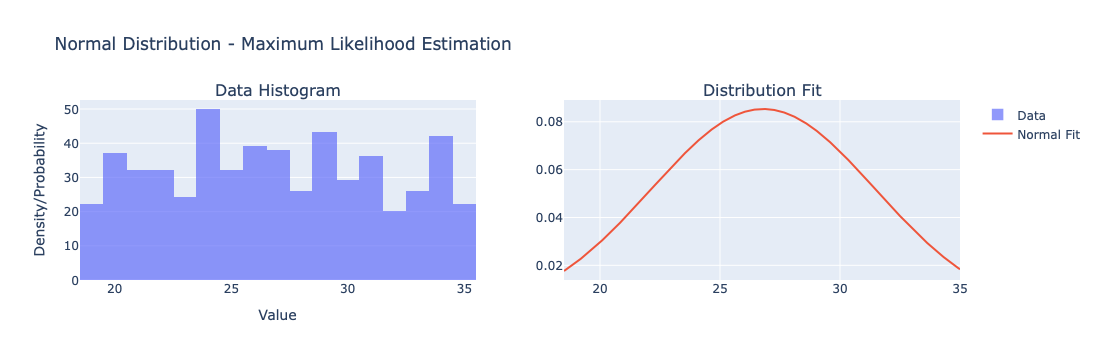

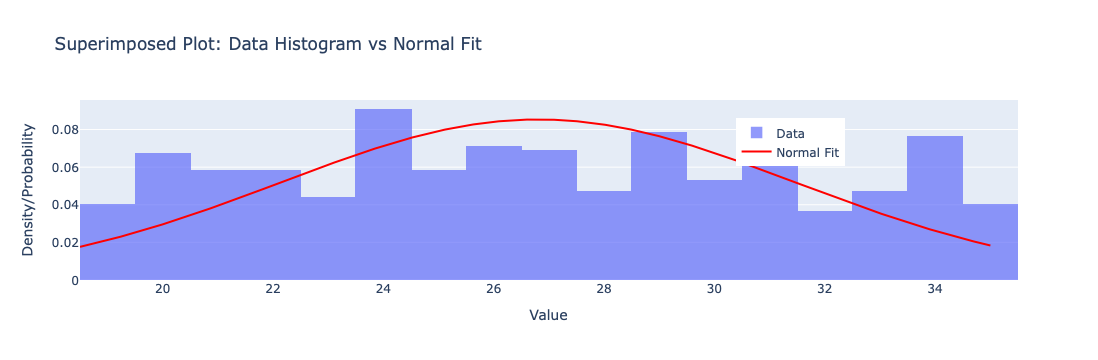


Thank you for using the Maximum Likelihood Estimator!


In [66]:
 if __name__ == "__main__":
    main()